Implement K-Means clustering to group unlabeled data into clusters 

In [1]:
#importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
#loading the dataset
df = pd.read_csv("/Users/rakshit/Downloads/customer_segmentation_data-2.csv")
df.shape

(1000, 9)

In [5]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [6]:
#getting information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [7]:
df["preferred_category"].value_counts()

preferred_category
Electronics      215
Sports           210
Home & Garden    206
Groceries        199
Clothing         170
Name: count, dtype: int64

In [8]:
#label encoding the features
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()
df["gender_n"] = label_encode.fit_transform(df["gender"])
df["preferred_category_n"] = label_encode.fit_transform(df["preferred_category"])

In [9]:
#dropping the old columns 
df_n = df.drop(columns=["gender","preferred_category"],axis=1)
df_n.head()

,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_n,preferred_category_n
0,1,38,99342,90,3,24,113.53,0,2
1,2,21,78852,60,2,42,41.93,0,4
2,3,60,126573,30,2,28,424.36,0,0
3,4,40,47099,74,9,5,991.93,2,3
4,5,65,140621,21,3,25,347.08,0,1


for this model we'll be using few features only --> income,spending_score 

In [75]:
x = df_n.iloc[:,[3,2]].values

In [76]:
print(x)

[[    90  99342]
 [    60  78852]
 [    30 126573]
 ...
 [    40 113097]
 [    63 113695]
 [     7  90420]]


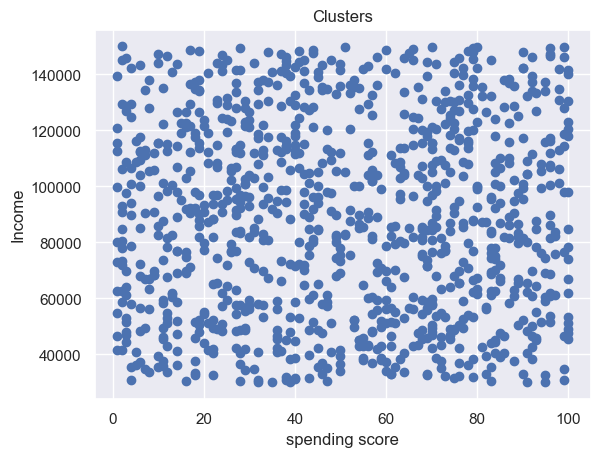

In [77]:
#visualising the clusters
sns.set_theme()
plt.scatter(df_n["spending_score"],df_n["income"])
plt.xlabel("spending score")
plt.ylabel("Income")
plt.title("Clusters")
plt.show()

In [78]:
#standardising the data
scaler = StandardScaler()
scaler.fit(x)

standanrdized_data = scaler.transform(x)
x = standanrdized_data

In [79]:
# finding the sum of squared error(sse)
sse = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)

    sse.append(kmeans.inertia_)

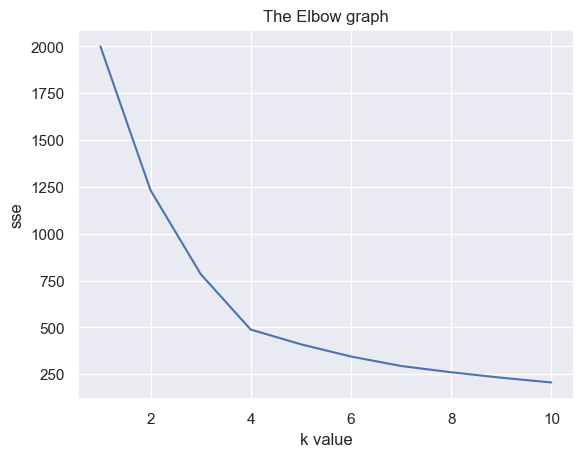

In [80]:
#visulising the elbow method
sns.set_theme()
plt.plot(range(1,11),sse)
plt.title("The Elbow graph")
plt.xlabel("k value")
plt.ylabel("sse")
plt.show()

We can see that appropiate k-value is 4

In [81]:
#training the model
kmeans = KMeans(n_clusters=4)
y_pred = kmeans.fit_predict(x)

print(y_pred)

[0 1 3 1 3 2 1 0 2 1 2 1 1 2 3 3 3 2 0 0 2 1 1 1 1 0 2 2 1 3 2 1 2 1 1 2 0
 1 2 3 2 0 2 1 2 3 3 1 1 0 1 0 0 1 1 1 2 3 2 3 2 1 1 2 3 0 0 1 0 2 1 2 3 0
 0 0 2 2 3 1 0 0 0 1 3 2 2 2 3 1 3 0 1 3 1 3 3 1 3 1 3 1 1 3 2 3 1 1 1 1 3
 1 2 2 3 0 3 2 0 2 3 1 2 1 1 1 1 1 1 3 1 0 0 1 0 3 1 0 3 1 1 2 0 1 3 3 3 0
 1 3 0 2 1 2 0 0 1 2 0 2 3 0 1 3 3 2 1 1 1 1 3 3 0 1 1 1 3 0 0 3 1 3 1 2 0
 0 3 2 0 1 0 3 2 1 1 3 1 0 2 3 3 2 3 3 0 3 1 1 3 3 1 2 3 2 0 3 2 3 1 0 1 2
 3 2 3 2 1 2 1 2 3 3 3 3 2 1 2 3 3 3 2 0 3 0 3 2 2 1 0 3 3 0 3 0 0 1 3 1 1
 1 0 2 0 1 0 1 3 3 0 1 2 3 1 0 0 2 3 2 0 1 2 2 3 2 3 0 0 0 1 1 2 1 1 3 0 3
 3 3 2 3 3 3 2 1 2 1 0 2 3 3 3 3 2 0 2 2 0 2 1 2 2 3 2 3 1 1 2 1 1 1 1 1 3
 3 0 0 1 0 0 2 2 1 1 3 3 3 2 0 2 3 3 1 0 1 1 0 3 3 2 1 0 3 0 0 3 0 1 0 2 1
 1 1 1 1 2 2 0 0 1 0 0 3 3 3 1 0 3 3 0 1 0 1 0 1 3 3 2 2 2 0 1 0 3 2 2 3 0
 0 1 3 1 2 3 3 1 1 3 3 2 1 1 2 3 3 1 0 2 3 2 0 0 0 0 1 1 0 2 3 0 0 1 2 0 2
 1 2 1 1 2 2 0 3 1 3 0 2 3 1 0 0 0 1 2 0 2 3 3 1 0 0 1 2 3 0 3 3 3 3 3 1 3
 0 1 2 1 1 0 0 3 3 1 1 0 

In [82]:
#finding the cluster centres
kmeans.cluster_centers_

array([[ 0.92590414,  0.95396416],
       [ 0.83161838, -0.7808047 ],
       [-0.92268064, -0.92968838],
       [-0.83748325,  0.81708823]])

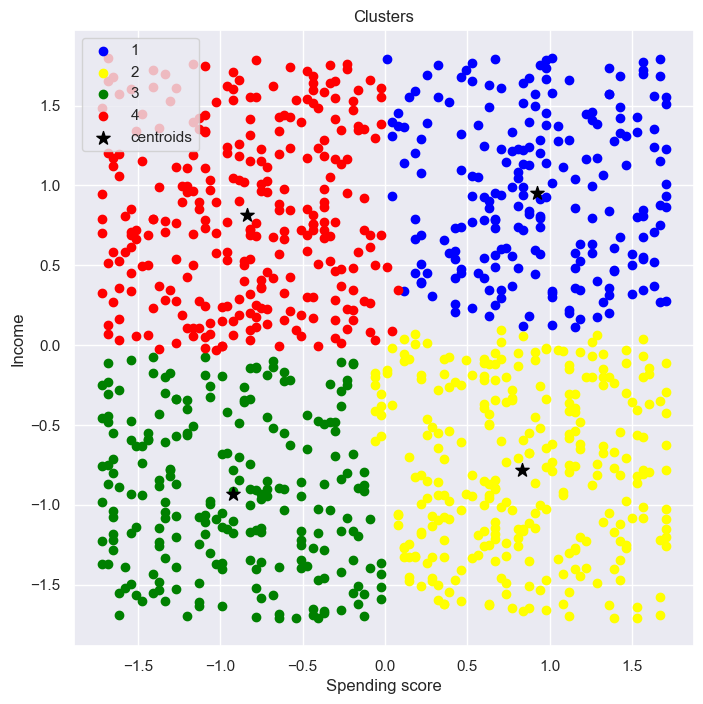

In [83]:
#visualising the clusters
plt.figure(figsize=(8,8))
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],c="blue",label="1")
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],c="yellow",label="2")
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],c="green",label="3")
plt.scatter(x[y_pred==3,0],x[y_pred==3,1],c="red",label="4")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="Black",label="centroids",marker="*")
plt.legend()
plt.xlabel("Spending score")
plt.ylabel("Income")
plt.title("Clusters")
plt.show()